In [1]:
# IMPORT
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import tensorflow as tf

In [2]:
# Kiểm tra phiên bản của TensorFlow
tf.__version__

'2.12.0'

In [4]:
# Tắt chế độ eager_execution của tensorflow
tf.compat.v1.disable_eager_execution()

In [6]:
# DATASET
from tensorflow.keras.datasets import cifar10, mnist

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print('x_train_full shape: {}, y_train_full.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 2s 0us/step
x_train_full shape: (50000, 32, 32, 3), y_train_full.shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test.shape: (10000, 1)


In [7]:
y_train_full = y_train_full.reshape(y_train_full.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train_full.shape, y_test.shape))

y_train_full shape: (50000,), y_test shape: (10000,)


In [8]:
# Tạo ra mức thẩm định
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

x_train: (40000, 32, 32, 3), y_train: (40000,), x_val: (10000, 32, 32, 3), y_val: (10000,)


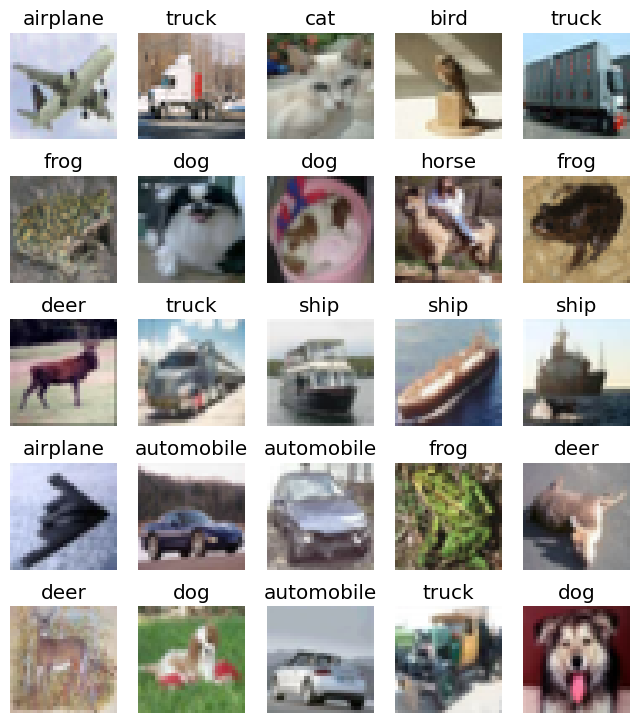

In [9]:
# Tạo ra 25 bức ảnh ngẫu nhiên từ tập dữ liệu
idxs = np.random.randint(x_train.shape[0], size=25)
images = x_train[idxs]
labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])
  
plt.show()

In [10]:
def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, x_train.shape[0] - batch_size)
    yield x_train[offset:offset+batch_size], y_train[offset:offset + batch_size]

In [11]:
# Xây dựng model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 64)       256       
 hNormalization)                                                 
                                                        

In [14]:
# Train model
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)
batch_size=1024
start = time()
history = model.fit_generator(
    train_gen(batch_size), epochs=25, 
    steps_per_epoch=np.ceil(x_train.shape[0]/batch_size).astype(int) ,
    validation_data = (x_val, y_val),
)
end = time()

Epoch 1/25


<ipython-input-14-ce865c106ef4>:9: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


40/40 [==============================] - ETA: 0s - batch: 19.5000 - size: 1024.0000 - loss: 2.2621 - sparse_categorical_accuracy: 0.2320

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


40/40 [==============================] - 76s 2s/step - batch: 19.5000 - size: 1024.0000 - loss: 2.2621 - sparse_categorical_accuracy: 0.2320 - val_loss: 3.2737 - val_sparse_categorical_accuracy: 0.1098
Epoch 2/25
40/40 [==============================] - 74s 2s/step - batch: 19.5000 - size: 1024.0000 - loss: 1.7071 - sparse_categorical_accuracy: 0.4001 - val_loss: 2.0797 - val_sparse_categorical_accuracy: 0.2748
Epoch 3/25
40/40 [==============================] - 72s 2s/step - batch: 19.5000 - size: 1024.0000 - loss: 1.4031 - sparse_categorical_accuracy: 0.5090 - val_loss: 1.7397 - val_sparse_categorical_accuracy: 0.3535
Epoch 4/25
40/40 [==============================] - 73s 2s/step - batch: 19.5000 - size: 1024.0000 - loss: 1.2300 - sparse_categorical_accuracy: 0.5725 - val_loss: 1.3476 - val_sparse_categorical_accuracy: 0.5368
Epoch 5/25
40/40 [==============================] - 73s 2s/step - batch: 19.5000 - size: 1024.0000 - loss: 1.1204 - sparse_categorical_accuracy: 0.6099 - val_l

In [15]:
# Thời gian trainning
print('Total training time {} seconds'.format(end - start))

Total training time 1830.4568326473236 seconds


In [16]:
def plot(losses, accuracies, subplot_title):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
  
  ax1.plot(losses)
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title(subplot_title[0])
  
  ax2.plot(accuracies)
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title(subplot_title[1])
    
  plt.show()

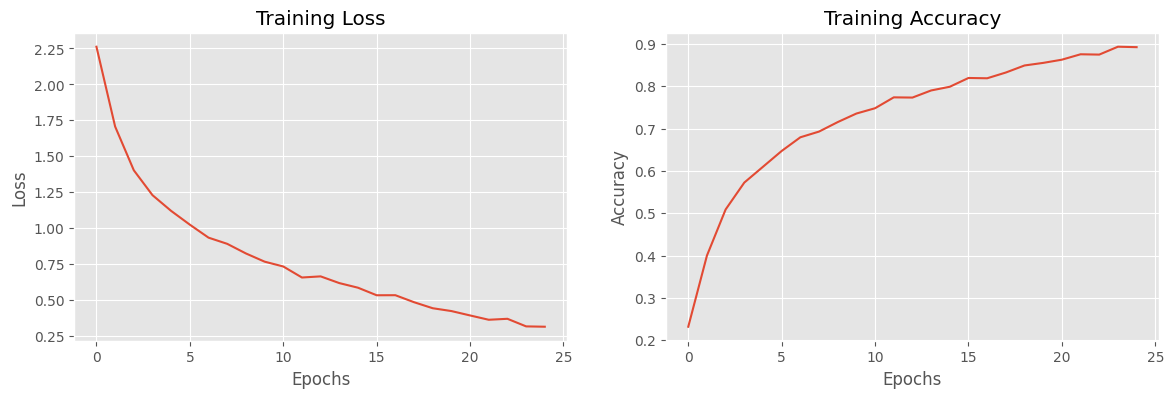

In [17]:
# Hiển thị độ chính xác và mất mát
plot(history.history['loss'], 
     history.history['sparse_categorical_accuracy'], 
     subplot_title=['Training Loss', 'Training Accuracy']
    )

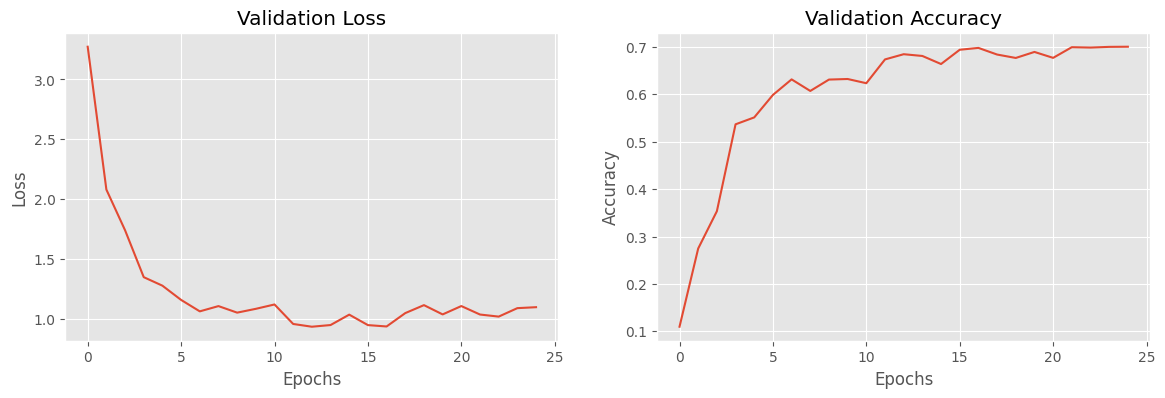

In [18]:
plot(history.history['val_loss'], 
     history.history['val_sparse_categorical_accuracy'], 
     subplot_title=['Validation Loss', 'Validation Accuracy']
    )

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


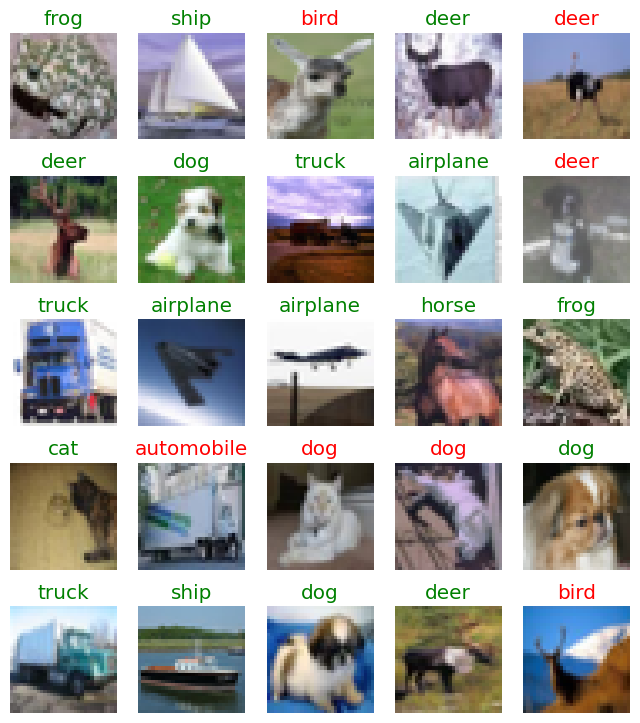

In [19]:
idxs = np.random.randint(x_test.shape[0], size=25)
images = x_test[idxs]
true_labels = y_test[idxs]

preds = np.argmax(model.predict(images), axis=1)
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = preds[i]
  color = 'g' if idx == true_labels[i] else 'r'
  ax.set_title(classnames[idx], color=color)

plt.show()